In [1]:
import numpy as np
import numba as nb
import math as mt
import copy
import timeit
from numba import prange
import time

In [2]:
N = 10
K = 1000
M = 10
A = np.arange(N*K).astype(np.float64)
A = A.reshape(N,K)
B = np.arange(K*M).astype(np.float64)
B = B.reshape(K,M)
BT = np.ascontiguousarray(B.T)
print(A.shape)
print(B.shape)
print(BT.shape)

(10, 1000)
(1000, 10)
(10, 1000)


In [3]:
def product(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    #print(N, M, K)
    C = np.empty(shape=[N,M])
    for i in range(N):
        for j in range(M):
            buf = 0
            for k in range(K):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

def productT(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[0]
    C = np.empty(shape=[N,M])
    for i in range(N):
        for j in range(M):
            buf = 0
            for k in range(K):
                buf = buf + A[i][k] * B[j][k]
            C[i][j] = buf
    return C


In [107]:
def f_time(func, args=(), kwargs={}, N=500):
    start_time = time.process_time_ns()
    for i in range(N):
        func(*args, **kwargs)
    elapsed_time = time.process_time_ns() - start_time
    return elapsed_time/N

In [34]:
f_time(product,(A,B))/10e+06

9.375

In [5]:
N = 100
C = np.random.sample((N,N))
D = np.random.sample((N,N))

0.00903125

In [6]:
start_time = time.process_time()
product(A,B)
elapsed_time = time.process_time() - start_time
elapsed_time

0.09375

In [7]:
%timeit product(A,B)
%timeit productT(A,BT)

89.9 ms ± 5.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
82.9 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
@nb.njit(nb.float64[:,::1](nb.float64[:,::1],nb.float64[:,::1]))
def NBproduct(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=(N,M), dtype=np.float64)
    for i in range(N):
        for j in range(M):
            buf = 0
            for k in range(K):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

@nb.njit(nb.float64[:,::1](nb.float64[:,::1],nb.float64[:,::1]))
def NBproductT(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[0]
    C = np.empty(shape=(N,M), dtype=np.float64)
    for i in range(N):
        for j in range(M):
            buf = 0
            for k in range(K):
                buf = buf + A[i][k] * B[j][k]
            C[i][j] = buf
    return C

%timeit NBproduct(A,B)
%timeit NBproductT(A,BT)

112 µs ± 7.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
115 µs ± 5.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%timeit A@B

8.72 µs ± 894 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
def productIJK(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=[N,M])
    for i in range(N):
        for j in range(M):
            buf = 0
            for k in range(K):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

def productJIK(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=[N,M])
    for j in range(M):
        for i in range(N):
            buf = 0
            for k in range(K):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

def productIKJ(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=[N,M])
    for i in range(N):
        for k in range(K):
            buf = 0
            for j in range(M):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

def productJKI(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=[N,M])
    for j in range(M):
        for k in range(K):
            buf = 0
            for i in range(N):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

def productKIJ(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=[N,M])
    for k in range(K):
        for i in range(N):
            buf = 0
            for j in range(M):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

def productKJI(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=[N,M])
    for k in range(K):
        for j in range(M):
            buf = 0
            for i in range(N):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

In [26]:
%timeit productIJK(C,D)
%timeit productJIK(C,D)
%timeit productIKJ(C,D)
%timeit productJKI(C,D)
%timeit productKIJ(C,D)
%timeit productKJI(C,D)

943 ms ± 80.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1 s ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.01 s ± 77.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
948 ms ± 64.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.03 s ± 45.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.03 s ± 75.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
@nb.njit(nb.float64[:,::1](nb.float64[:,::1],nb.float64[:,::1]), parallel=True)
def NproductIJK(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=(N,M), dtype=np.float64)
    for i in prange(N):
        for j in range(M):
            buf = 0
            for k in range(K):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

@nb.njit(nb.float64[:,::1](nb.float64[:,::1],nb.float64[:,::1]), parallel=True)
def NproductJIK(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=(N,M), dtype=np.float64)
    for j in prange(M):
        for i in range(N):
            buf = 0
            for k in range(K):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

@nb.njit(nb.float64[:,::1](nb.float64[:,::1],nb.float64[:,::1]), parallel=True)
def NproductIKJ(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=(N,M), dtype=np.float64)
    for i in prange(N):
        for k in range(K):
            buf = 0
            for j in range(M):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

@nb.njit(nb.float64[:,::1](nb.float64[:,::1],nb.float64[:,::1]), parallel=True)
def NproductJKI(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=(N,M), dtype=np.float64)
    for j in prange(M):
        for k in range(K):
            buf = 0
            for i in range(N):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

@nb.njit(nb.float64[:,::1](nb.float64[:,::1],nb.float64[:,::1]), parallel=True)
def NproductKIJ(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=(N,M), dtype=np.float64)
    for k in prange(K):
        for i in range(N):
            buf = 0
            for j in range(M):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

@nb.njit(nb.float64[:,::1](nb.float64[:,::1],nb.float64[:,::1]), parallel=True)
def NproductKJI(A,B):
    N = A.shape[0]
    K = A.shape[1]
    M = B.shape[1]
    C = np.empty(shape=(N,M), dtype=np.float64)
    for k in prange(K):
        for j in range(M):
            buf = 0
            for i in range(N):
                buf = buf + A[i][k] * B[k][j]
            C[i][j] = buf
    return C

In [30]:
%timeit NproductIJK(C,D)
%timeit NproductJIK(C,D)
%timeit NproductIKJ(C,D)
%timeit NproductJKI(C,D)
%timeit NproductKIJ(C,D)
%timeit NproductKJI(C,D)

378 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
346 µs ± 5.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
371 µs ± 3.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
363 µs ± 3.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
293 µs ± 3.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
332 µs ± 7.81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
%timeit NproductIJK(A,B)
%timeit NproductJIK(A,B)
%timeit NproductIKJ(A,B)
%timeit NproductJKI(A,B)
%timeit NproductKIJ(A,B)
%timeit NproductKJI(A,B)

92.9 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
93.8 µs ± 854 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
82.1 µs ± 370 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
78.8 µs ± 326 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
68.4 µs ± 478 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
43.6 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
def Strassen(A,B):
    if (A.shape[0] != A.shape[1]) & (B.shape[0] != B.shape[1]) & (A.shape[0] != B.shape[0]):
        print("Not a square matrix")
        return
    N = A.shape[0]
    if N>=64:
        return A@B
    p = mt.ceil(mt.log2(N))
    dim = 2**p
    A2 = A
    B2 = B
    delta = dim - N
    for i in range(delta):
        adh = np.zeros((N,1))
        A2 = np.hstack((A2, adh))
        B2 = np.hstack((B2, adh))
    for i in range(delta):
        adv = np.zeros((1,dim))
        A2 = np.vstack((A2,adv))
        B2 = np.vstack((B2,adv))
    half = (2**(p-1))
    A11 = A2[:half,:half]
    A12 = A2[:half,half:]
    A21 = A2[half:,:half]
    A22 = A2[half:,half:]
    B11 = B2[:half,:half]
    B12 = B2[:half,half:]
    B21 = B2[half:,:half]
    B22 = B2[half:,half:]
    P1 = Strassen((A11 + A22), (B11 + B22))
    P2 = Strassen((A21 + A22), B11)
    P3 = Strassen(A11, (B12 - B22))
    P4 = Strassen(A22, (B21 - B11))
    P5 = Strassen((A11 + A12), B22)
    P6 = Strassen((A21 - A11), (B11 + B12))
    P7 = Strassen((A12 - A22), (B21 + B22))
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6
    C1 = np.hstack((C11,C12))
    C2 = np.hstack((C21,C22))
    C = np.vstack((C1,C2))
    C = C[:N,:N]
    return C

In [16]:
N = 100
C = np.random.sample((N,N))
D = np.random.sample((N,N))

In [23]:
%timeit Strassen(D,D)
%timeit C@D

37.5 µs ± 3.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.7 µs ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [31]:
# Итого по результатам
print('Optimized definition')
%timeit productIJK(C,D)
print('Optimized Numba with parallel computing')
%timeit NproductKIJ(C,D)
print('Strassen')
%timeit Strassen(C,D)
print('Numpy')
%timeit C@D

Optimized definition
905 ms ± 62.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Optimized Numba with parallel computing
246 µs ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Strassen
32 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Numpy
29.1 µs ± 807 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [108]:
q = 200
t = np.zeros(q)
for i in range(1,q):
    C = None
    D = None
    C = np.random.sample((i,i))
    D = np.random.sample((i,i))
    t[i] = f_time(NproductKIJ,(C,D))/10e+06

Text(0, 0.5, 'Time')

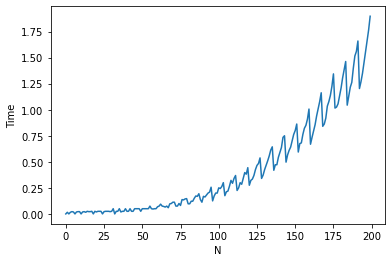

In [109]:
niter = [i for i in range(q)]
import matplotlib.pyplot as plt
plt.plot(niter, t)
plt.xlabel('N')
plt.ylabel('Time')